In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:

# Reading The Dataset
data = pd.read_csv('Ck dataset.csv')
data


,Member_number,Date,itemDescription
0,1808,21-07-2015,Cavin’s Cold coffee
1,2552,05-01-2015,Cavin’s Mango Lassi
2,2300,19-09-2015,Cavin's Stawberry Lassi
3,1187,12-12-2015,Cavin's Vanilla Milshake
4,3037,01-02-2015,Cavin's Buttermilk
...,...,...,...
5361,3952,30-10-2015,Bhima- Cut Mango
5362,3016,01-12-2015,Cavin’s Mango Lassi
5363,2118,18-07-2015,Cavin's Lassi
5364,1940,14-02-2015,Chik - Anti Dandruff Shamphoo


In [5]:
# Data Exploration
x = data['itemDescription'].value_counts().sort_values(ascending=False)[:10]
x

itemDescription
Bhima- Cut Mango           268
Cavin's Lassi              215
Cavin's Stawberry Lassi    160
Bhima- Mixed Veg           154
Nyle Damage Repair         153
Spinz BB Cream             148
Ruchi- Vadu Mango          146
Spinz Talc - Exotic        141
Maa Mango                  128
Cavin's Buttermilk         127
Name: count, dtype: int64

In [6]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [7]:
data

,Member_number,Date,itemDescription
0,1808,21-07-2015,Cavin’s Cold coffee
1,2552,05-01-2015,Cavin’s Mango Lassi
2,2300,19-09-2015,Cavin's Stawberry Lassi
3,1187,12-12-2015,Cavin's Vanilla Milshake
4,3037,01-02-2015,Cavin's Buttermilk
...,...,...,...
5361,3952,30-10-2015,Bhima- Cut Mango
5362,3016,01-12-2015,Cavin’s Mango Lassi
5363,2118,18-07-2015,Cavin's Lassi
5364,1940,14-02-2015,Chik - Anti Dandruff Shamphoo


In [8]:
data['Quantity'] = 1
data

,Member_number,Date,itemDescription,Quantity
0,1808,21-07-2015,Cavin’s Cold coffee,1
1,2552,05-01-2015,Cavin’s Mango Lassi,1
2,2300,19-09-2015,Cavin's Stawberry Lassi,1
3,1187,12-12-2015,Cavin's Vanilla Milshake,1
4,3037,01-02-2015,Cavin's Buttermilk,1
...,...,...,...,...
5361,3952,30-10-2015,Bhima- Cut Mango,1
5362,3016,01-12-2015,Cavin’s Mango Lassi,1
5363,2118,18-07-2015,Cavin's Lassi,1
5364,1940,14-02-2015,Chik - Anti Dandruff Shamphoo,1


In [9]:
transactions = data.groupby(['Member_number', 'itemDescription'])['Quantity'].sum().unstack().reset_index().set_index('Member_number')
transactions = transactions.fillna(0)
transactions

itemDescription,Bhima- Cut Mango,Bhima- Lime,Bhima- Mango Thokku,Bhima- Mixed Veg,Bhima- Red Chilli,Cavin's Buttermilk,Cavin's Chocolate Milkshake,Cavin's Kaju Butterscotch Milkshake,Cavin's Lassi,Cavin's Stawberry Lassi,...,Spinz BB Cream,Spinz BB Talc,Spinz Deo - Blue Bounce,Spinz Deo - Enchante,Spinz Deo - Mystic White,Spinz Deo - Pristine Green,Spinz Deo - Y+B43:B61ellow Blossom,Spinz Deo - Yellow Blossom,Spinz Perfumed Deo - Pristine Green 200 ml,Spinz Talc - Exotic
Member_number,,,,,,,,,,,,,,,,,,,,,
1000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1006,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
def encode(x):
    if x <=0:
        return 0
    elif x>=0:
        return 1
basket = transactions.applymap(encode)

In [11]:
basket

itemDescription,Bhima- Cut Mango,Bhima- Lime,Bhima- Mango Thokku,Bhima- Mixed Veg,Bhima- Red Chilli,Cavin's Buttermilk,Cavin's Chocolate Milkshake,Cavin's Kaju Butterscotch Milkshake,Cavin's Lassi,Cavin's Stawberry Lassi,...,Spinz BB Cream,Spinz BB Talc,Spinz Deo - Blue Bounce,Spinz Deo - Enchante,Spinz Deo - Mystic White,Spinz Deo - Pristine Green,Spinz Deo - Y+B43:B61ellow Blossom,Spinz Deo - Yellow Blossom,Spinz Perfumed Deo - Pristine Green 200 ml,Spinz Talc - Exotic
Member_number,,,,,,,,,,,,,,,,,,,,,
1000,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1001,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1006,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
item_counts = data['itemDescription'].value_counts().reset_index()
item_counts.columns = ['itemDescription', 'Count']

In [65]:
top_5_items = item_counts.head(5)
print(top_5_items)

           itemDescription  Count
0         Bhima- Cut Mango    268
1            Cavin's Lassi    215
2  Cavin's Stawberry Lassi    160
3         Bhima- Mixed Veg    154
4       Nyle Damage Repair    153


In [67]:
top_5_items = item_counts.head(5)


<Axes: xlabel='itemDescription', ylabel='Count'>

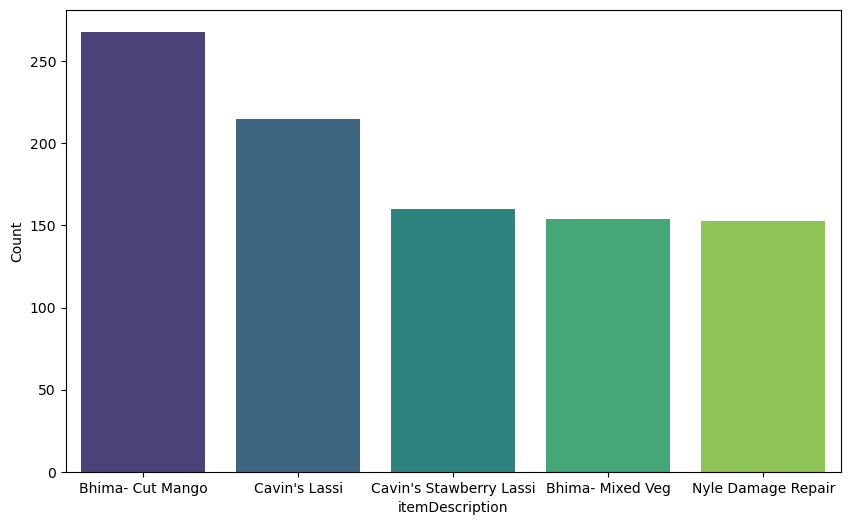

In [68]:
plt.figure(figsize=(10, 6))
sns.barplot(data=top_5_items, x='itemDescription', y='Count', palette='viridis')

<Axes: >

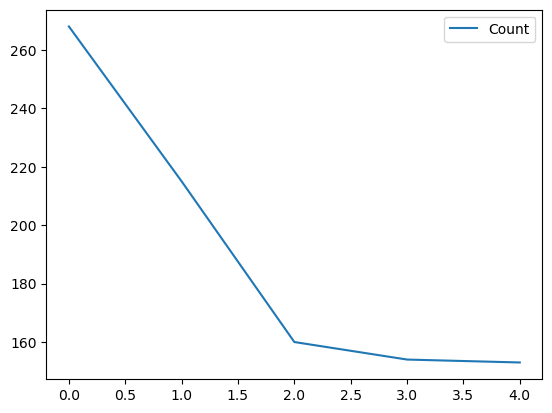

In [69]:
sns.lineplot(top_5_items)

In [71]:
plt.show()

In [72]:
basket = data.groupby(['Member_number', 'itemDescription'])['Date'].count().unstack().reset_index().fillna(0)
basket.set_index('Member_number', inplace=True)

In [73]:
basket = basket.applymap(lambda x: 1 if x > 0 else 0)

In [74]:
frequent_itemsets = apriori(basket, min_support=0.01, use_colnames=True)

C:\Users\rahul\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [75]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

In [76]:
print("Frequent Itemsets:")
print(frequent_itemsets)

print("\nAssociation Rules:")
print(rules)

Frequent Itemsets:
     support                                           itemsets
0   0.089176                                 (Bhima- Cut Mango)
1   0.042206                                      (Bhima- Lime)
2   0.041865                              (Bhima- Mango Thokku)
3   0.052076                                 (Bhima- Mixed Veg)
4   0.037440                                (Bhima- Red Chilli)
5   0.041865                               (Cavin's Buttermilk)
6   0.033016                     (Cavin's Chocolate Milkshake )
7   0.042206              (Cavin's Kaju Butterscotch Milkshake)
8   0.071477                                    (Cavin's Lassi)
9   0.053438                          (Cavin's Stawberry Lassi)
10  0.025528                         (Cavin's Vanilla Milshake)
11  0.028931                              (Cavin’s Mango Lassi)
12  0.021784                    (Chik - Anti Dandruff Shamphoo)
13  0.040163                    (Chik - Thick & Glossy Shampoo)
14  0.016678         

In [77]:
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric


In [78]:
rules[(rules['confidence']>0.4) & (rules['lift']>1)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric


In [53]:
basket = data.groupby(['Member_number', 'itemDescription'])['Date'].count().unstack().reset_index().fillna(0)

In [54]:
basket.set_index('Member_number', inplace=True)


In [55]:
basket = basket.applymap(lambda x: 1 if x > 0 else 0)

In [56]:
frequent_itemsets = apriori(basket, min_support=0.01, use_colnames=True)

C:\Users\rahul\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [57]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

In [58]:
rules.to_csv('association_rules_with_metrics.csv', index=False

SyntaxError: incomplete input (1406743993.py, line 1)

In [59]:
rules = rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']]

In [60]:
print("Association Rules with Support, Confidence, and Lift:")
print(rules)

Association Rules with Support, Confidence, and Lift:
Empty DataFrame
Columns: [antecedents, consequents, support, confidence, lift]
Index: []


In [28]:
rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head()

,antecedents,consequents,support,confidence,lift
0,(Maa Mango),(Bhima- Cut Mango),0.005106,0.119048,1.334969
1,(Bhima- Cut Mango),(Maa Mango),0.005106,0.057252,1.334969


In [29]:
# Apply the apriori algorithm with a lower minimum support threshold
frequent_itemsets = apriori(basket, min_support=0.005, use_colnames=True)

# Generate the association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Display the rules
rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head()

C:\Users\rahul\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,support,confidence,lift
0,(Maa Mango),(Bhima- Cut Mango),0.005106,0.119048,1.334969
1,(Bhima- Cut Mango),(Maa Mango),0.005106,0.057252,1.334969


In [30]:
frequent_itemsets.sort_values(by='support', ascending=False).head(10)

,support,itemsets
0,0.089176,(Bhima- Cut Mango)
8,0.071477,(Cavin's Lassi)
9,0.053438,(Cavin's Stawberry Lassi)
3,0.052076,(Bhima- Mixed Veg)
40,0.051055,(Nyle Damage Repair)
55,0.050034,(Spinz BB Cream)
53,0.048673,(Ruchi- Vadu Mango)
64,0.047311,(Spinz Talc - Exotic)
34,0.042886,(Maa Mango)
7,0.042206,(Cavin's Kaju Butterscotch Milkshake)
